In [127]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd
from datetime import date
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt



data = pd.read_csv('marketing_campaign.csv', sep = '\t')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [128]:
pd.options.mode.chained_assignment = None

In [129]:
collected_year = 2020 #датасет был собран 4 года назад
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], errors='coerce')
data['Standing'] = collected_year - data['Dt_Customer'].dt.year
data['Age'] = collected_year - data['Year_Birth']

In [130]:
data['Age_Group'] = data['Age'].apply(lambda x: 1 if x <= 16 else (
    2 if 17 <= x <= 30 else (
    3 if 30 < x <=  45 else 4
    )
))
# 4 возрастных группы. тип переменной - ранговый

In [131]:
data['MntTotal'] = data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']
data['NumAllPurchases'] = data['NumWebPurchases']+data['NumCatalogPurchases']+data['NumStorePurchases']
data['TotalAcceptedCmp'] = data['AcceptedCmp1']+data['AcceptedCmp2']+data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5']+data['Response']

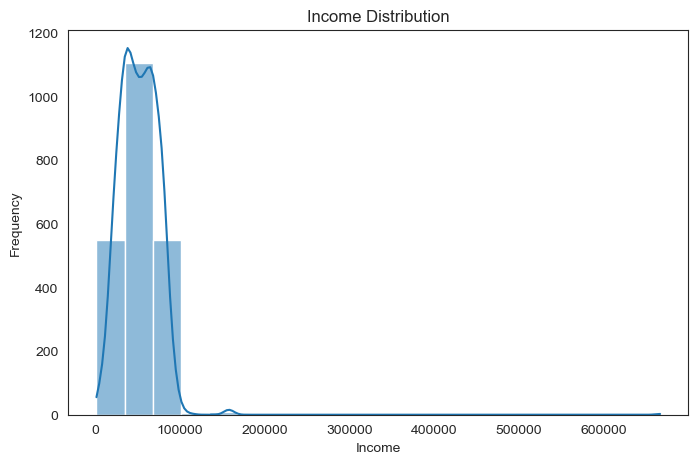

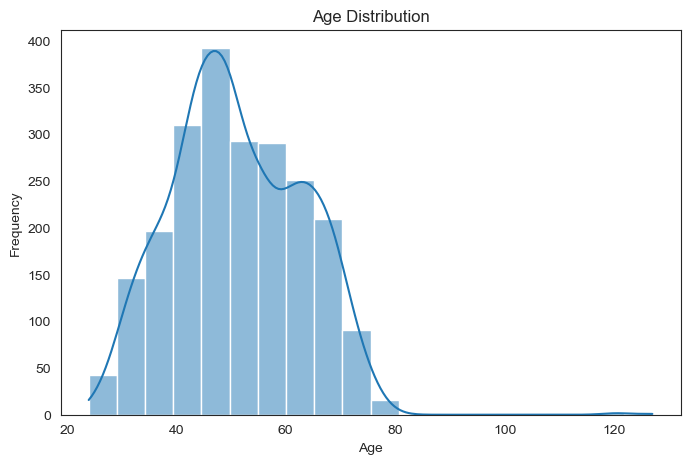

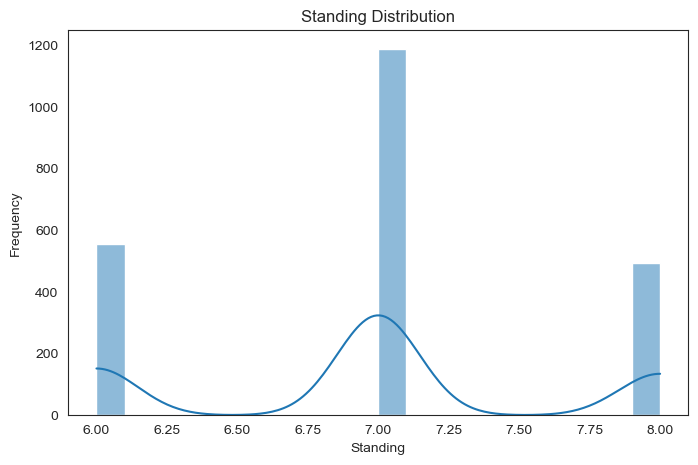

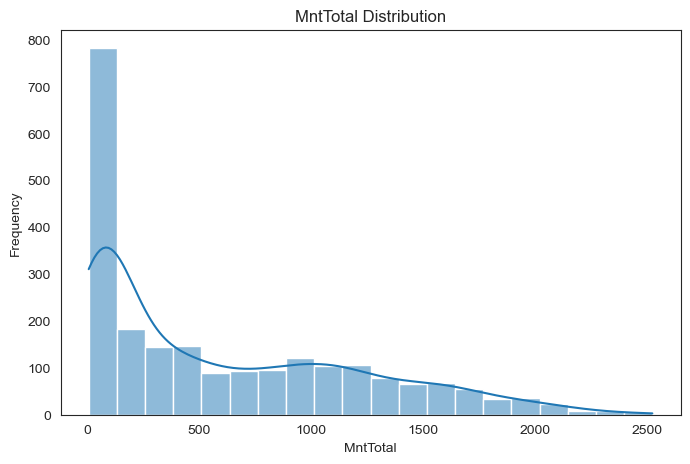

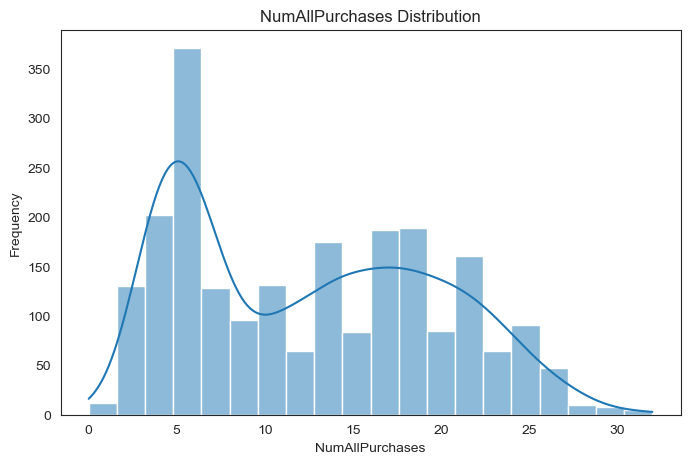

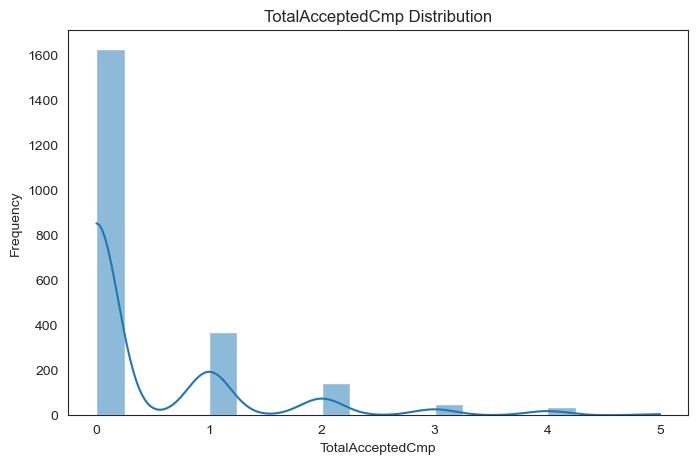

In [132]:
import seaborn as sns
for col in ['Income', 'Age', 'Standing', 'MntTotal', 'NumAllPurchases', 'TotalAcceptedCmp']:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show();

In [133]:
data = data[data['NumAllPurchases'] != 0]
data = data[data['MntTotal'] != 0]
data['TotalAcceptedCmp'] = np.where(data['TotalAcceptedCmp'] > 1, 1, data['TotalAcceptedCmp'])

In [134]:
data['Income'].fillna(data['Income'].mean(), inplace = True) # заполнение пропусков

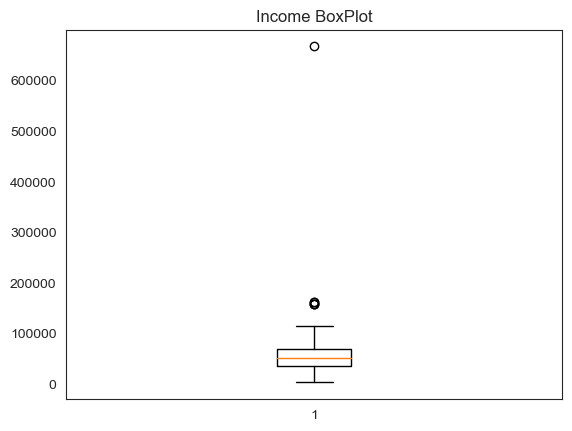

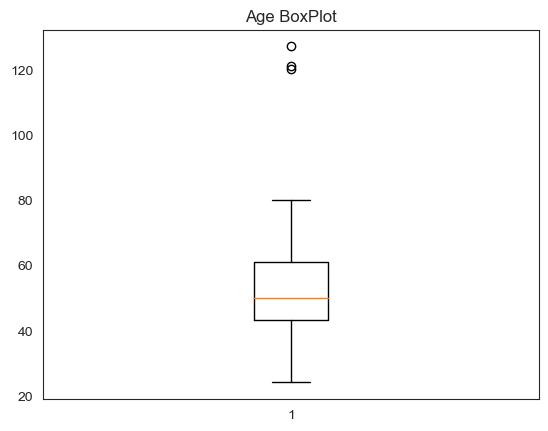

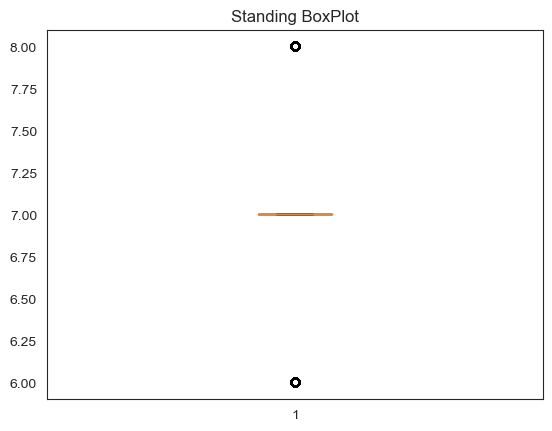

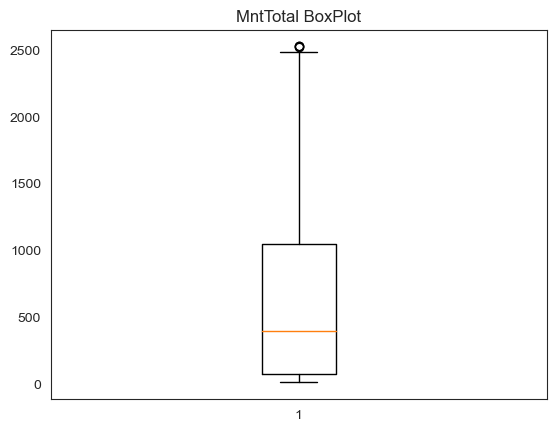

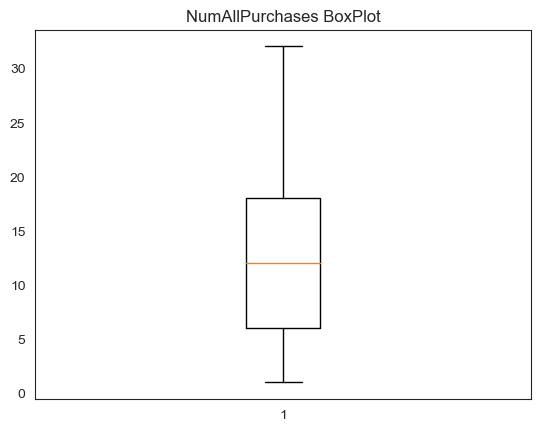

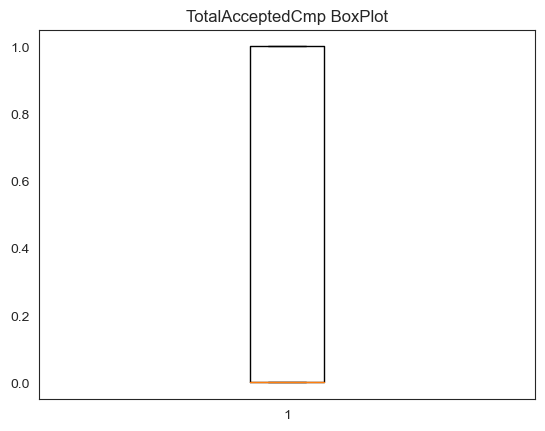

In [135]:
for col in ['Income', 'Age', 'Standing', 'MntTotal', 'NumAllPurchases', 'TotalAcceptedCmp']:
    plt.title(f'{col} BoxPlot')
    plt.boxplot(data[col])
    plt.show()

In [136]:
Q1 = data['Income'].quantile(0.25)
Q3 = data['Income'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Income'] < (Q1 - 1.5 * IQR)) | (data['Income'] > (Q3 + 1.5 * IQR)))] #удаление выбросов

In [137]:
data = data[data['Age'] < 100]

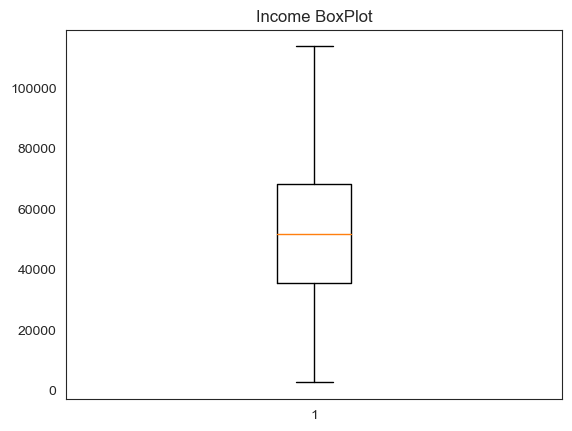

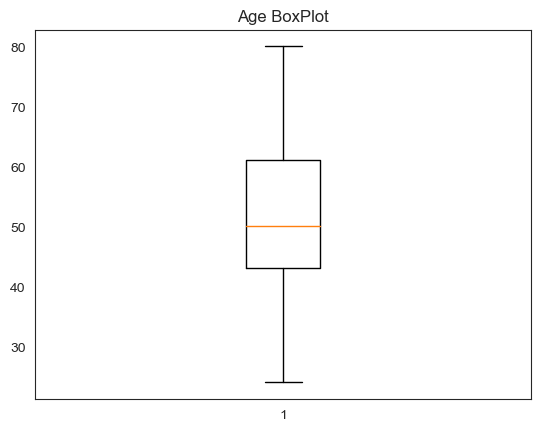

In [138]:
for col in ['Income', 'Age']:
    plt.title(f'{col} BoxPlot')
    plt.boxplot(data[col])
    plt.show()

In [139]:
from sklearn.preprocessing import StandardScaler

In [140]:
data_clust = data[['Income', 'Complain', 'Standing', 'Age_Group', 'MntTotal', 'NumAllPurchases', 'TotalAcceptedCmp']].copy()
data_clust

,Income,Complain,Standing,Age_Group,MntTotal,NumAllPurchases,TotalAcceptedCmp
0,58138.0,0,8,4,1617,22,1
1,46344.0,0,6,4,27,4,0
2,71613.0,0,7,4,776,20,0
3,26646.0,0,6,3,53,6,0
4,58293.0,0,6,3,422,14,0
...,...,...,...,...,...,...,...
2235,61223.0,0,7,4,1341,16,0
2236,64014.0,0,6,4,444,15,1
2237,56981.0,0,6,3,1241,18,1
2238,69245.0,0,6,4,843,21,0


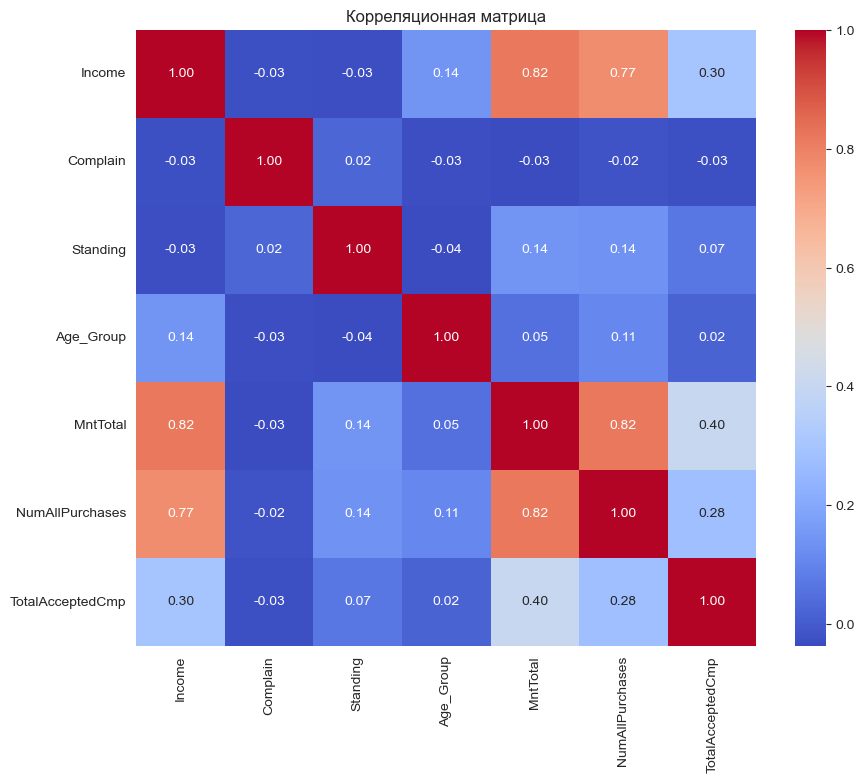

In [142]:
correlation_matrix = data_clust.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

In [66]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

In [69]:
import numpy as np

def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def calculate_distance_matrix(data):
    n = len(data)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            distance_matrix[i, j] = euclidean_distance(data[i], data[j])
    return distance_matrix

def ward_linkage(data):
    clusters = [[i] for i in range(len(data))]
    distance_matrix = calculate_distance_matrix(data)

    while len(clusters) > 1:
        min_dist = np.inf
        merge_i, merge_j = -1, -1

        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                dist = 0
                for idx_i in clusters[i]:
                    for idx_j in clusters[j]:
                        dist += distance_matrix[idx_i, idx_j]
                dist /= (len(clusters[i]) * len(clusters[j]))

                if dist < min_dist:
                    min_dist = dist
                    merge_i, merge_j = i, j

        new_cluster = clusters[merge_i] + clusters[merge_j]
        clusters.pop(merge_j)
        clusters[merge_i] = new_cluster

    return clusters

data = data_clust.values
clusters = ward_linkage(data)
data_clust['Cluster'] = clusters

data_clust.groupby('Cluster').size()

Cluster
1    239
2    856
3    574
4    556
dtype: int64

In [49]:
distance_matrix

[[6.56000000e+02 7.45000000e+02 0.00000000e+00 2.00000000e+00]
 [1.35000000e+03 2.21100000e+03 0.00000000e+00 2.00000000e+00]
 [1.02900000e+03 1.99100000e+03 0.00000000e+00 2.00000000e+00]
 ...
 [4.44000000e+03 4.44500000e+03 3.83687647e+05 1.09500000e+03]
 [4.44300000e+03 4.44400000e+03 4.45965364e+05 1.13000000e+03]
 [4.44600000e+03 4.44700000e+03 1.15662537e+06 2.22500000e+03]]


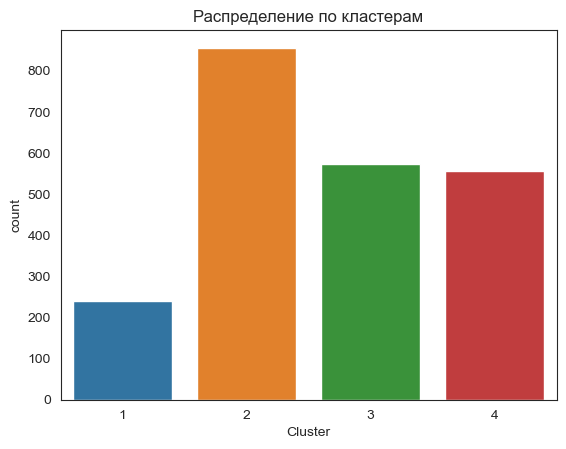

In [99]:
pl = sns.countplot(x=data_clust["Cluster"])
pl.set_title("Распределение по кластерам")
plt.show()

In [101]:
print(data_clust['Cluster'])

0       3
1       2
2       4
3       2
4       3
       ..
2235    3
2236    3
2237    3
2238    4
2239    3
Name: Cluster, Length: 2225, dtype: int32


In [71]:
data_clust

,Income,Complain,Standing,Age_Group,MntTotal,NumAllPurchases,TotalAcceptedCmp,Cluster
0,58138.0,0,8,4,1617,22,1,3
1,46344.0,0,6,4,27,4,0,2
2,71613.0,0,7,4,776,20,0,4
3,26646.0,0,6,3,53,6,0,2
4,58293.0,0,6,3,422,14,0,3
...,...,...,...,...,...,...,...,...
2235,61223.0,0,7,4,1341,16,0,3
2236,64014.0,0,6,4,444,15,1,3
2237,56981.0,0,6,3,1241,18,1,3
2238,69245.0,0,6,4,843,21,0,4


In [75]:
import seaborn as sns
import matplotlib.lines as lines
import matplotlib.pyplot as plt
%matplotlib inline

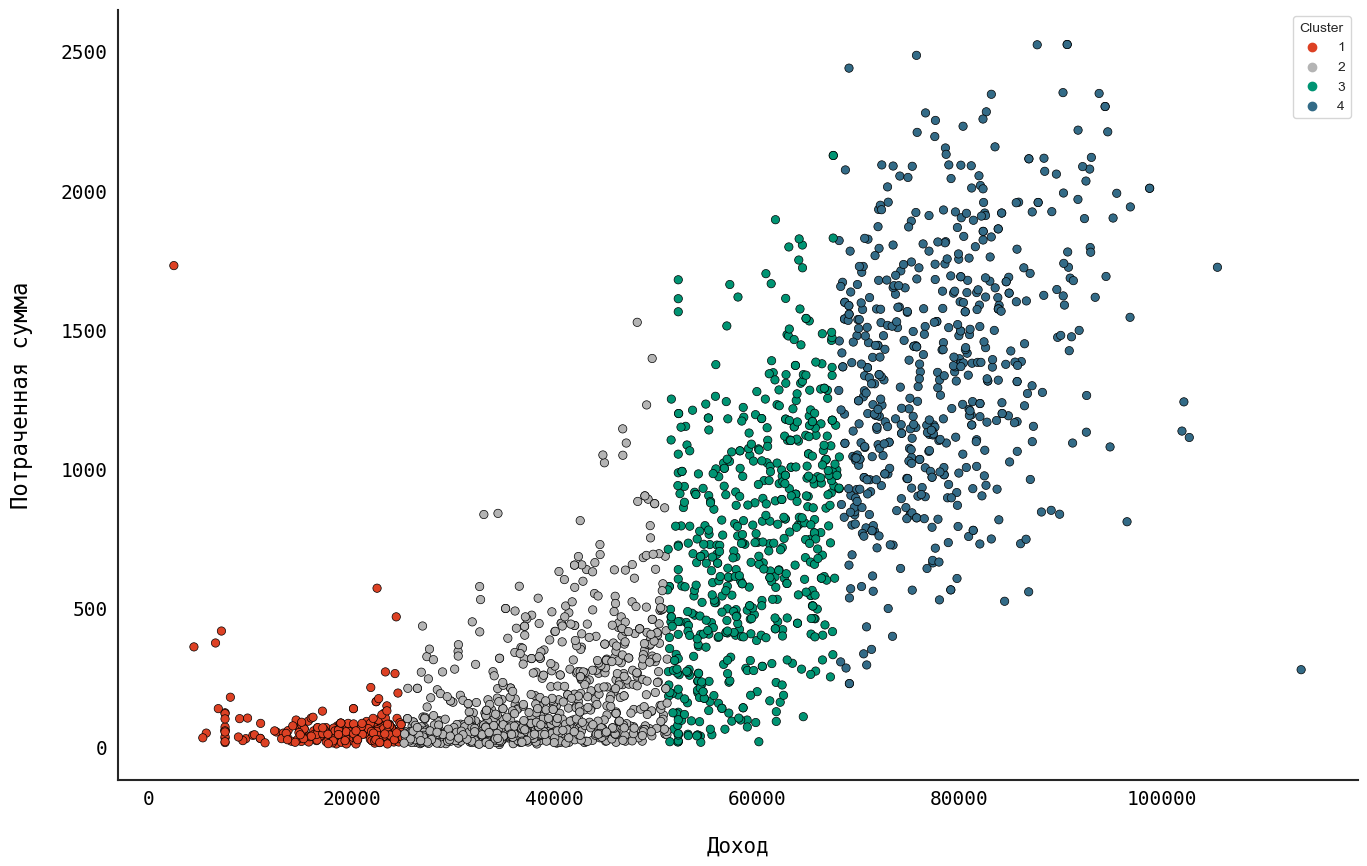

In [84]:
plt.figure(figsize = (16, 10))
sns.set_style("white")
plt.title('''''', size = 25, y = 1.05, fontname = 'monospace', color = 'black', ha = 'center')
a = sns.scatterplot(data = data_clust, x = "Income", y = "MntTotal", hue = 'Cluster', palette = ['#dd4124', '#b4b4b4', '#009473', '#336b87'], sizes = (1, 8), linewidth = 0.5, edgecolor = "black")
plt.xticks(fontname = 'monospace', size = 14, color = 'black')
plt.yticks(fontname = 'monospace', size = 14, color = 'black')
plt.xlabel('Доход', labelpad = 20, fontname = 'monospace', fontsize = 15, color = 'black')
plt.ylabel('Потраченная сумма', labelpad = 20, fontname = 'monospace', fontsize = 16, color = 'black')


for j in ['right', 'top']:
        a.spines[j].set_visible(False)
for j in ['bottom', 'left']:
    a.spines[j].set_linewidth(1.5)
    
plt.show()

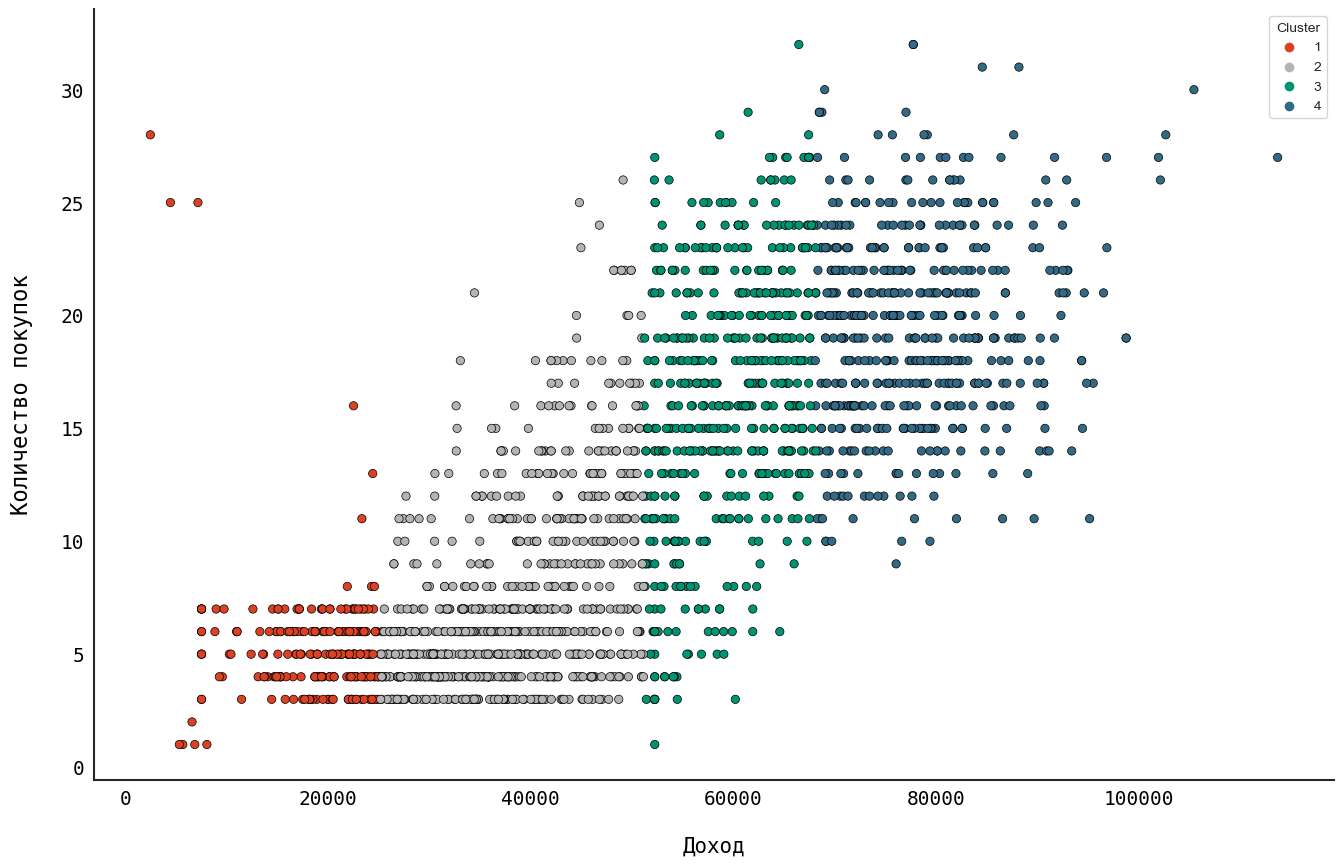

In [85]:
plt.figure(figsize = (16, 10))
sns.set_style("white")
plt.title('''''', size = 25, y = 1.05, fontname = 'monospace', color = 'black', ha = 'center')
a = sns.scatterplot(data = data_clust, x = "Income", y = "NumAllPurchases", hue = 'Cluster', palette = ['#dd4124', '#b4b4b4', '#009473', '#336b87'], sizes = (1, 8), linewidth = 0.5, edgecolor = "black")
plt.xticks(fontname = 'monospace', size = 14, color = 'black')
plt.yticks(fontname = 'monospace', size = 14, color = 'black')
plt.xlabel('Доход', labelpad = 20, fontname = 'monospace', fontsize = 15, color = 'black')
plt.ylabel('Количество покупок', labelpad = 20, fontname = 'monospace', fontsize = 16, color = 'black')


for j in ['right', 'top']:
        a.spines[j].set_visible(False)
for j in ['bottom', 'left']:
    a.spines[j].set_linewidth(1.5)
    
plt.show()

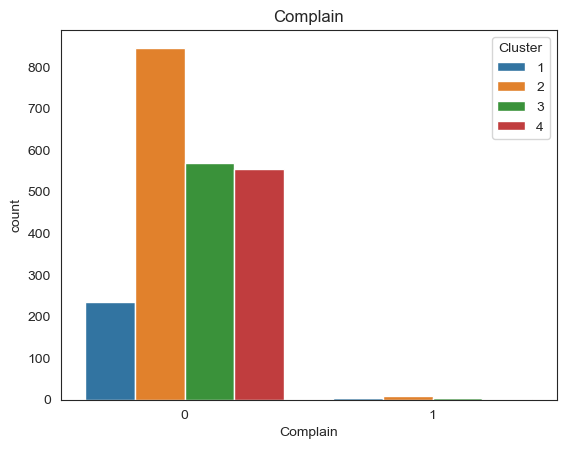

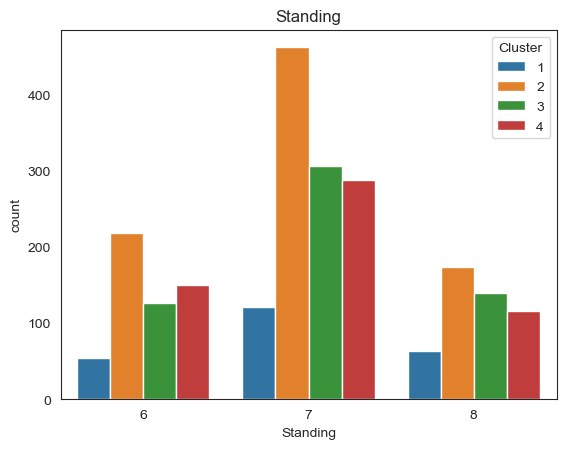

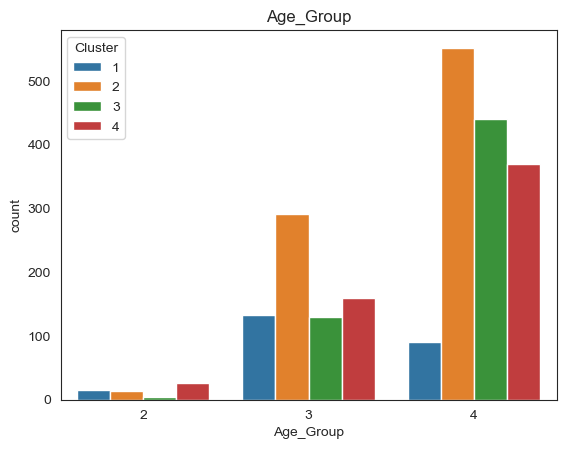

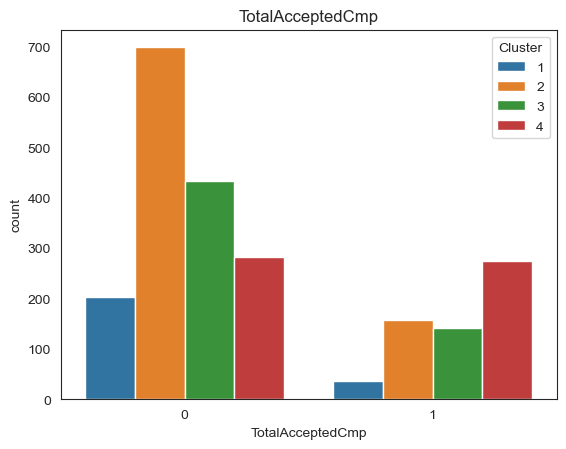

In [109]:
for col in ['Complain', 'Standing', 'Age_Group', 'TotalAcceptedCmp']:
    plt.figure()
    pl = sns.countplot(x=data_clust[col],hue=data_clust["Cluster"])
    pl.set_title(col)
    plt.show()

In [92]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data_clust, data_clust['Cluster'])

print(f'Среднее значение силуэта для результатов кластеризации: {silhouette_avg}')

Среднее значение силуэта для результатов кластеризации: 0.4926918456872155
